In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics
from keras.models import load_model

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

Using TensorFlow backend.


Criação dos modelos preditivos que usam as variáveis booleanas da base das escolas para prever o Ideb2019. O processo é muito similar ao dos modelos numéricos, porem não iremos aplicar a PCA (tentei aplicar uma Multiple Correspondence Analysis (MCA), como visto nesse paper, https://www.utdallas.edu/~herve/Abdi-MCA2007-pretty.pdf , porem tive problemas na implementação do paper, já que não achei uma biblioteca com o MCA já implementado para python)

In [2]:
train0709 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\train_0709_bool.csv')
train0911 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\train_0911_bool.csv')
train1113 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\train_1113_bool.csv')
train1315 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\train_1315_bool.csv')

In [3]:
pred1517 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\pred_1517_bool.csv')

In [4]:
train0709_idebs = pd.DataFrame()
train0911_idebs = pd.DataFrame()
train1113_idebs = pd.DataFrame()
train1315_idebs = pd.DataFrame()
pred1517_idebs = pd.DataFrame()

train0709_idebs['Ideb2007'] = train0709['Ideb2007']
train0709_idebs['Ideb2009'] = train0709['Ideb2009']

train0911_idebs['Ideb2009'] = train0911['Ideb2009']
train0911_idebs['Ideb2011'] = train0911['Ideb2011']

train1113_idebs['Ideb2011'] = train1113['Ideb2011']
train1113_idebs['Ideb2013'] = train1113['Ideb2013']

train1315_idebs['Ideb2013'] = train1315['Ideb2013']
train1315_idebs['Ideb2015'] = train1315['Ideb2015']

pred1517_idebs['Ideb2015'] = pred1517['Ideb2015']
pred1517_idebs['Ideb2017'] = pred1517['Ideb2017']

In [5]:
train0709_target = train0709[['Ideb2011']]
train0709.drop(columns=['Ideb2011','Ideb2013','Ideb2015','Ideb2017'],inplace=True)

train0911_target = train0911[['Ideb2013']]
train0911.drop(columns=['Ideb2007','Ideb2013','Ideb2015','Ideb2017'],inplace=True)

train1113_target = train1113[['Ideb2015']]
train1113.drop(columns=['Ideb2007','Ideb2009','Ideb2015','Ideb2017'],inplace=True)

train1315_target = train1315[['Ideb2017']]
train1315.drop(columns=['Ideb2007','Ideb2009','Ideb2011','Ideb2017'],inplace=True)

pred1517.drop(columns=['Ideb2007','Ideb2009','Ideb2011','Ideb2013'],inplace=True)

In [10]:
list(pred1517.columns)

['Unnamed: 0',
 'in_comum_creche0',
 'in_comum_pre0',
 'in_comum_fund_ai0',
 'in_comum_fund_af0',
 'in_comum_medio_integrado0',
 'in_comum_medio_normal0',
 'in_comum_medio_medio0',
 'in_em_atividade0',
 'in_local_func_predio_escolar0',
 'in_local_func_salas_empresa0',
 'in_local_func_socioeducativo0',
 'in_local_func_unid_prisional0',
 'in_local_func_prisional_socio0',
 'in_local_func_templo_igreja0',
 'in_local_func_casa_professor0',
 'in_local_func_salas_outra_esc0',
 'in_predio_compartilhado0',
 'in_agua_filtrada0',
 'in_agua_rede_publica0',
 'in_agua_poco_artesiano0',
 'in_agua_cacimba0',
 'in_agua_fonte_rio0',
 'in_agua_inexistente0',
 'in_energia_rede_publica0',
 'in_energia_gerador0',
 'in_energia_outros0',
 'in_energia_inexistente0',
 'in_esgoto_rede_publica0',
 'in_esgoto_fossa0',
 'in_esgoto_inexistente0',
 'in_lixo_coleta_periodica0',
 'in_lixo_queima0',
 'in_lixo_joga_outra_area0',
 'in_lixo_recicla0',
 'in_lixo_enterra0',
 'in_lixo_outros0',
 'in_sala_diretoria0',
 'in_sal

In [6]:
Cod_Escolas = pred1517['Cod_Escola_Completo']

In [7]:
train0709.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais0','is_anosiniciais0.1'],inplace=True)
train0911.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0'],inplace=True)
train1113.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0'],inplace=True)
train1315.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0'],inplace=True)

pred1517.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais0','is_anosiniciais0.1'],inplace=True)

In [8]:
train0709_s = scale(train0709)
train0911_s = scale(train0911)
train1113_s = scale(train1113)
train1315_s = scale(train1315)

pred1517_s = scale(pred1517)

train0709_idebs_s = scale(train0709_idebs)
train0911_idebs_s = scale(train0911_idebs)
train1113_idebs_s = scale(train1113_idebs)
train1315_idebs_s = scale(train1315_idebs)

pred1517_idebs_s = scale(pred1517_idebs)

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by the scale function.
  
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:

Modelo treinado com 0709

In [10]:
X_train_0709, X_test_0709, y_train_0709, y_test_0709 = train_test_split(train0709,train0709_target,test_size=0.1,random_state=932)

In [11]:
model_0709 = Sequential()
n_cols = X_train_0709.shape[1]
model_0709.add(Dense(43,activation='relu',input_shape = (n_cols,)))
model_0709.add(Dense(23,activation='relu',input_shape = (n_cols,)))
#model_0709.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_0709.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=10)

In [12]:
model_0709.compile(optimizer='adam',loss='mean_squared_error')
model_0709.fit(X_train_0709,y_train_0709,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23838 samples, validate on 5960 samples
Epoch 1/100
23838/23838 [==============================] - 2s 82us/step - loss: 0.7863 - val_loss: 0.2855
Epoch 2/100
23838/23838 [==============================] - 2s 64us/step - loss: 0.2932 - val_loss: 0.2853
Epoch 3/100
23838/23838 [==============================] - 1s 57us/step - loss: 0.2913 - val_loss: 0.2813
Epoch 4/100
23838/23838 [==============================] - 1s 56us/step - loss: 0.2898 - val_loss: 0.2837
Epoch 5/100
23838/23838 [==============================] - 1s 56us/step - loss: 0.2883 - val_loss: 0.2810
Epoch 6/100
23838/23838 [==============================] - 1s 58us/step - loss: 0.2867 - val_loss: 0.2802
Epoch 7/100
23838/23838 [==============================] - 1s 58us/step - loss: 0.2848 - val_loss: 0.2819
Epoch 8/100
23838/23838 [==============================] - 1s 59us/step - loss: 0.2861 - val_loss: 0.2932
Epoch 9/100
23838/23838 [==============================] - 1s 57us/step - loss: 0.2849 - val_loss: 0.27

In [13]:
model_0709.evaluate(X_test_0709,y_test_0709)

3311/3311 [==============================] - 0s 26us/step


0.2893818975197012

In [76]:
model_0709.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_0709_bool.h5')

Modelo treinado com 0911

In [14]:
X_train_0911, X_test_0911, y_train_0911, y_test_0911 = train_test_split(train0911,train0911_target,test_size=0.1,random_state=932)

In [58]:
model_0911 = Sequential()
n_cols = X_train_0911.shape[1]
model_0911.add(Dense(25,activation='relu',input_shape = (n_cols,)))
model_0911.add(Dense(13,activation='relu',input_shape = (n_cols,)))
#model_0911.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_0911.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [59]:
model_0911.compile(optimizer='adam',loss='mean_squared_error')
model_0911.fit(X_train_0911,y_train_0911,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23838 samples, validate on 5960 samples
Epoch 1/100
23838/23838 [==============================] - 2s 90us/step - loss: 0.6093 - val_loss: 0.3126
Epoch 2/100
23838/23838 [==============================] - 2s 71us/step - loss: 0.2961 - val_loss: 0.3056
Epoch 3/100
23838/23838 [==============================] - 2s 65us/step - loss: 0.2963 - val_loss: 0.3069
Epoch 4/100
23838/23838 [==============================] - 1s 59us/step - loss: 0.2966 - val_loss: 0.3081


In [60]:
model_0911.evaluate(X_test_0911,y_test_0911)

3311/3311 [==============================] - 0s 30us/step


0.3027386831997817

In [77]:
model_0911.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_0911_bool.h5')

Modelo treinado com 1113

In [21]:
X_train_1113, X_test_1113, y_train_1113, y_test_1113 = train_test_split(train1113,train1113_target,test_size=0.1,random_state=932)

In [61]:
model_1113 = Sequential()
n_cols = X_train_1113.shape[1]
model_1113.add(Dense(43,activation='relu',input_shape = (n_cols,)))
model_1113.add(Dense(20,activation='relu',input_shape = (n_cols,)))
#model_1113.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_1113.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [62]:
model_1113.compile(optimizer='adam',loss='mean_squared_error')
model_1113.fit(X_train_1113,y_train_1113,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23838 samples, validate on 5960 samples
Epoch 1/100
23838/23838 [==============================] - 2s 86us/step - loss: 0.5246 - val_loss: 0.2866
Epoch 2/100
23838/23838 [==============================] - 1s 61us/step - loss: 0.2773 - val_loss: 0.2767
Epoch 3/100
23838/23838 [==============================] - 2s 68us/step - loss: 0.2745 - val_loss: 0.2833
Epoch 4/100
23838/23838 [==============================] - 2s 74us/step - loss: 0.2760 - val_loss: 0.2735
Epoch 5/100
23838/23838 [==============================] - 2s 69us/step - loss: 0.2717 - val_loss: 0.2713
Epoch 6/100
23838/23838 [==============================] - 1s 63us/step - loss: 0.2723 - val_loss: 0.3262
Epoch 7/100
23838/23838 [==============================] - 2s 69us/step - loss: 0.2733 - val_loss: 0.2827


In [63]:
model_1113.evaluate(X_test_1113,y_test_1113)

3311/3311 [==============================] - 0s 32us/step


0.2762785462572005

In [78]:
model_1113.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_1113_bool.h5')

Modelo treinado com 1315

In [64]:
X_train_1315, X_test_1315, y_train_1315, y_test_1315 = train_test_split(train1315,train1315_target,test_size=0.1,random_state=932)

In [65]:
model_1315 = Sequential()
n_cols = X_train_1315.shape[1]
model_1315.add(Dense(38,activation='relu',input_shape = (n_cols,)))
model_1315.add(Dense(23,activation='relu',input_shape = (n_cols,)))
#model_1315.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_1315.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [66]:
model_1315.compile(optimizer='adam',loss='mean_squared_error')
model_1315.fit(X_train_1315,y_train_1315,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23838 samples, validate on 5960 samples
Epoch 1/100
23838/23838 [==============================] - 2s 93us/step - loss: 0.5272 - val_loss: 0.2612
Epoch 2/100
23838/23838 [==============================] - 1s 63us/step - loss: 0.2660 - val_loss: 0.3006
Epoch 3/100
23838/23838 [==============================] - 2s 64us/step - loss: 0.2622 - val_loss: 0.2550
Epoch 4/100
23838/23838 [==============================] - 2s 64us/step - loss: 0.2626 - val_loss: 0.3154
Epoch 5/100
23838/23838 [==============================] - 2s 65us/step - loss: 0.2604 - val_loss: 0.2516
Epoch 6/100
23838/23838 [==============================] - 2s 65us/step - loss: 0.2591 - val_loss: 0.2559
Epoch 7/100
23838/23838 [==============================] - 2s 64us/step - loss: 0.2584 - val_loss: 0.2515
Epoch 8/100
23838/23838 [==============================] - 2s 65us/step - loss: 0.2578 - val_loss: 0.2572
Epoch 9/100
23838/23838 [==============================] - 2s 64us/step - loss: 0.2554 - val_loss: 0.25

In [67]:
model_1315.evaluate(X_test_1315,y_test_1315)

3311/3311 [==============================] - 0s 30us/step


0.2644954842856484

In [79]:
model_1315.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_1315_bool.h5')

In [57]:
pd.DataFrame(pred1517).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred1517_bool.csv')

Vendo resultado dos modelos na base 1517

In [80]:
pred_0709 = pd.Series(data=model_0709.predict(pred1517)[:,0])
pred_0911 = pd.Series(data=model_0911.predict(pred1517)[:,0])
pred_1113 = pd.Series(data=model_1113.predict(pred1517)[:,0])
pred_1315 = pd.Series(data=model_1315.predict(pred1517)[:,0])

In [69]:
ideb2011_media = 4.679378 #train0709_target.mean()
ideb2013_media = 4.827755 #train0911_target.mean()
ideb2015_media = 5.131154 #train1113_target.mean()
ideb2017_media = 5.352877 #train1315_target.mean()

In [70]:
cte = (5.352877/5.131154 + 5.131154/4.827755 + 4.827755/4.679378)/3

In [81]:
output = pd.DataFrame()
output['pred_0709_bool'] = pred_0709#(pred1517['Ideb2017'].mean() + (pred_0709 - ideb2011_media))
output['pred_0911_bool'] = pred_0911#(pred1517['Ideb2017'].mean() + (pred_0911 - ideb2013_media))
output['pred_1113_bool'] = pred_1113#(pred1517['Ideb2017'].mean() + (pred_1113 - ideb2015_media))
output['pred_1315_bool'] = pred_1315#(pred1517['Ideb2017'].mean() + (pred_1315 - ideb2017_media))
output['ensemble_bool'] = ((output['pred_0709_bool']+output['pred_0911_bool']+output['pred_1113_bool']+output['pred_1315_bool'])/4)
output['Ideb2017'] = pred1517['Ideb2017'] 
output['dif'] = output['ensemble_bool'] - output['Ideb2017']

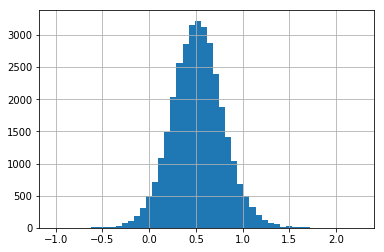

In [72]:
output['dif'].hist(bins=50)

In [82]:
output.describe()

,pred_0709_bool,pred_0911_bool,pred_1113_bool,pred_1315_bool,ensemble_bool,Ideb2017,dif
count,33109.000000,33109.000000,33109.000000,33109.000000,33109.000000,33109.000000,33109.000000
mean,5.686888,5.412178,5.510764,5.450119,5.514972,5.352974,0.162010
std,0.916164,0.970378,1.016308,1.040072,0.964227,1.101314,0.277640
min,2.549642,2.154695,2.508620,2.352255,2.474143,1.600000,-1.366984
25%,5.021593,4.700875,4.741983,4.654648,4.796675,4.600000,-0.019069
50%,5.669899,5.391757,5.460251,5.401623,5.473536,5.300000,0.159827
75%,6.350487,6.133194,6.283236,6.248546,6.246613,6.200000,0.339480
max,9.533525,9.096869,9.648744,9.266863,9.386499,9.600000,1.890576


In [45]:
output_sort_dif = output.sort_values(['dif'],ascending=False)
output_sort_dif

,pred_0709,pred_0911,pred_1113,pred_1315,ensemble,Ideb2017,dif,Cod_Escola
16639,8.916245,7.826588,7.712863,8.716056,8.292938,8.1,2.767938,35216185
30107,8.022028,7.424187,7.503023,7.696084,7.661330,7.3,2.761330,41129636
28522,7.809846,7.334523,7.357326,7.524714,7.506603,7.4,2.756603,35227407
29896,8.392632,7.751066,7.539706,8.495644,8.044762,8.0,2.669762,41093755
29955,8.826130,7.548514,7.758229,8.237893,8.092692,7.9,2.667692,41368940
17041,9.598798,7.993013,8.231568,8.555511,8.594722,8.6,2.644722,42116031
16646,8.536139,7.530887,7.665279,8.004235,7.934135,8.1,2.634135,35090136
28529,7.563078,6.955121,7.391695,7.508910,7.354701,7.2,2.629701,35245948
30010,7.899292,7.437760,6.954862,7.861715,7.538407,7.3,2.613407,41133331
1849,8.938924,7.831657,7.825237,8.111258,8.176769,7.9,2.601769,35020102


In [53]:
best_esc_pred2 = output_sort_dif.head(1000)

In [54]:
best_esc_pred2.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\best_schools\best_esc_pred2(sem_ideb)_bool.csv')